# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [3]:
spaceship.shape

(8693, 14)

**Check for data types**

In [4]:
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Check for missing values**

In [5]:
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [6]:
spaceship_clean = spaceship.dropna()

In [8]:
spaceship_clean.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

**KNN**

K Nearest Neighbors is a distance based algorithm, and requeries all **input data to be numerical.**

Let's only select numerical columns as our features.

In [10]:
spaceship_clean_num = spaceship_clean.select_dtypes(include=['int64', 'float64'])
spaceship_clean_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           6606 non-null   float64
 1   RoomService   6606 non-null   float64
 2   FoodCourt     6606 non-null   float64
 3   ShoppingMall  6606 non-null   float64
 4   Spa           6606 non-null   float64
 5   VRDeck        6606 non-null   float64
dtypes: float64(6)
memory usage: 361.3 KB


In [11]:
spaceship_clean_num.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


And also lets define our target.

In [12]:
spaceship_clean_num.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.074783,0.135844,0.042314,0.123820,0.105031
RoomService,0.074783,1.000000,-0.013614,0.060478,0.012472,-0.026002
FoodCourt,0.135844,-0.013614,1.000000,-0.012320,0.215995,0.216997
ShoppingMall,0.042314,0.060478,-0.012320,1.000000,0.022168,0.000383
Spa,0.123820,0.012472,0.215995,0.022168,1.000000,0.149447
VRDeck,0.105031,-0.026002,0.216997,0.000383,0.149447,1.000000


In [13]:
features = spaceship_clean_num
target  = spaceship_clean["Transported"]

**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [14]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [15]:
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3432,32.0,0.0,0.0,0.0,0.0,0.0
7312,4.0,0.0,0.0,0.0,0.0,0.0
2042,30.0,0.0,236.0,0.0,1149.0,0.0
4999,17.0,13.0,0.0,565.0,367.0,1.0
5755,26.0,0.0,0.0,0.0,0.0,0.0


In [16]:
y_train.head()

3432    False
7312     True
2042    False
4999    False
5755     True
Name: Transported, dtype: bool

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=55)

Fit the model to your data.

In [18]:
knn.fit(X_train, y_train)

,n_neighbors,55
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Evaluate your model.

In [19]:
knn.score(X_test, y_test)

0.7798789712556732

In [20]:
l = []
for i in range(5,70):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    r2 = knn.score(X_test, y_test)
    l.append(r2)
    
    
    print(f"k = {i}  || R^2 = {r2}")

k = 5  || R^2 = 0.7655068078668684
k = 6  || R^2 = 0.7481089258698941
k = 7  || R^2 = 0.7768532526475038
k = 8  || R^2 = 0.7753403933434191
k = 9  || R^2 = 0.7768532526475038
k = 10  || R^2 = 0.7685325264750378
k = 11  || R^2 = 0.7745839636913767
k = 12  || R^2 = 0.7776096822995462
k = 13  || R^2 = 0.783661119515885
k = 14  || R^2 = 0.7859304084720121
k = 15  || R^2 = 0.7829046898638427
k = 16  || R^2 = 0.7866868381240545
k = 17  || R^2 = 0.7866868381240545
k = 18  || R^2 = 0.783661119515885
k = 19  || R^2 = 0.7821482602118003
k = 20  || R^2 = 0.7829046898638427
k = 21  || R^2 = 0.7851739788199698
k = 22  || R^2 = 0.7798789712556732
k = 23  || R^2 = 0.7821482602118003
k = 24  || R^2 = 0.7821482602118003
k = 25  || R^2 = 0.7829046898638427
k = 26  || R^2 = 0.7844175491679274
k = 27  || R^2 = 0.7829046898638427
k = 28  || R^2 = 0.7813918305597579
k = 29  || R^2 = 0.7813918305597579
k = 30  || R^2 = 0.783661119515885
k = 31  || R^2 = 0.7829046898638427
k = 32  || R^2 = 0.7783661119515886


In [21]:
import numpy as np

In [22]:
import matplotlib.pyplot as plt

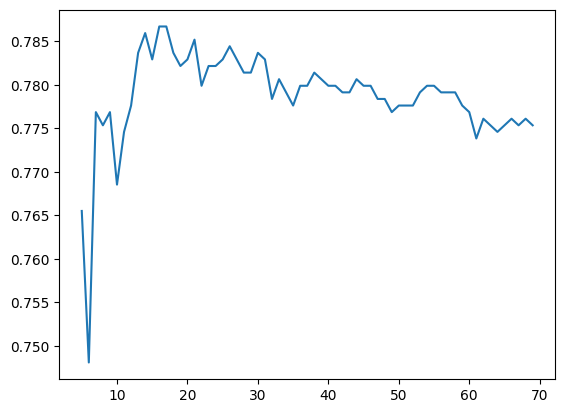

In [23]:
plt.plot(list(range(5,70)), l)

In [24]:
max_precision = max(l)

In [25]:
k = l.index(max_precision)
print(f'The correct parameter k is {k}')

The correct parameter k is 11


**Congratulations, you have just developed your first Machine Learning model!**